<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/homework_1_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# linear regression 구현 (1 week)
# 연차로부터 연봉예측하기
# learning rate(lr)를 바꾸면서 실험하기
# Optimizer를 바꾸면서 실험하기
# loss fuction을 mean_absolute_error로 바꿔서 실험하기

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = '' # username
os.environ['KAGGLE_KEY'] = '' # key

!kaggle datasets download -d rohankayan/years-of-experience-and-salary-dataset

  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 333kB/s]


In [5]:
!unzip /content/years-of-experience-and-salary-dataset.zip

Archive:  /content/years-of-experience-and-salary-dataset.zip
  inflating: Salary_Data.csv         


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

salary_data = pd.read_csv('Salary_Data.csv')
salary_data.tail(5)


,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [10]:
salary_data.shape

(30, 2)

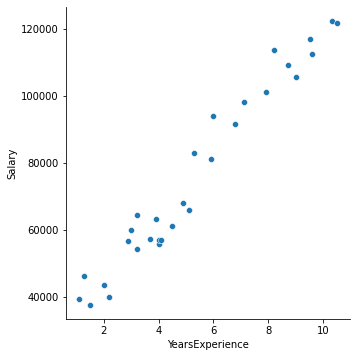

In [14]:
sns.pairplot(salary_data, x_vars=['YearsExperience'], y_vars=['Salary'], height=5)

In [19]:
x_data = np.array(salary_data['YearsExperience'], dtype=np.float32)
y_data = np.array(salary_data['Salary'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(30,)
(30,)
(30, 1)
(30, 1)
(24, 1) (6, 1)
(24, 1) (6, 1)


In [32]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer=Adam(lr=20))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), 
    # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증된 결과를 보여준다.
    epochs=1000 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
1/1 [==============================] - 0s 363ms/step - loss: 79737.2422 - val_loss: 61010.2500
Epoch 2/1000
1/1 [==============================] - 0s 21ms/step - loss: 79604.3203 - val_loss: 60910.5820
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 79471.4062 - val_loss: 60810.9180
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 79338.4922 - val_loss: 60711.2500
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 79205.5703 - val_loss: 60611.5820
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 79072.6641 - val_loss: 60511.9180
Epoch 7/1000
1/1 [==============================] - 0s 26ms/step - loss: 78939.7422 - val_loss: 60412.2500
Epoch 8/1000
1/1 [==============================] - 0s 23ms/step - loss: 78806.8281 - val_loss: 60312.5820
Epoch 9/1000
1/1 [==============================] - 0s 35ms/step - loss: 78673.9141 - val_loss: 60212.9180
Epoch 10/1000
1/1 [=================

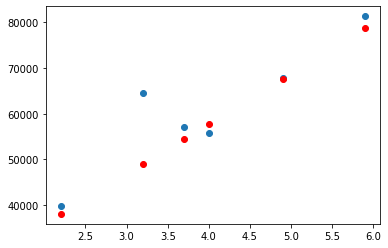

In [33]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val)
plt.scatter(x_val, y_pred, color='r')
plt.show()